# 手を動かしながら学ぶモダンなデータ操作とtidyなデータ
[Reference](http://uribo.hatenablog.com/entry/2015/12/01/055000)

What is tidy data?
* 一つの変数に対して一つの列が与えられるべし（同一の変数を複数の列にまたがせない）
* それぞれの観測値は一つの行に収めるべし（同一の個体に対して複数の行を与えない）
* 観測データの集合は表形式で表現することができる

## Overview

Main functions
* `gather()`: 複数の変数に分かれている共通の変数を１つの変数内の観測値としてまとめます（spread()と対応）
* `spread()`: 項目とその値を元にして、変数を分割します（gather()と対応）
* `separate()`: １つの列を複数列に分割します

In [1]:
setwd('/Users/Shusei/Desktop/temp')

In [2]:
options(warn=-1)
options(repr.plot.width=4, repr.plot.height=4)

In [27]:
library(ggplot2)
library(readxl)
library(broom)
library(tidyr)
library(dplyr)

In [4]:
df_uryu <- read_excel(path = "UR-BC1-TreeGbh-2005-2012-ver1.xls",
                    sheet  = 1,
                    skip   = 86,
                    na     = "na")

DEFINEDNAME: 21 00 00 01 0b 00 00 00 01 00 00 00 00 00 00 0d 3b 00 00 56 00 9a 03 00 00 26 00 
DEFINEDNAME: 21 00 00 01 0b 00 00 00 01 00 00 00 00 00 00 0d 3b 00 00 56 00 9a 03 00 00 26 00 
DEFINEDNAME: 21 00 00 01 0b 00 00 00 01 00 00 00 00 00 00 0d 3b 00 00 56 00 9a 03 00 00 26 00 
DEFINEDNAME: 21 00 00 01 0b 00 00 00 01 00 00 00 00 00 00 0d 3b 00 00 56 00 9a 03 00 00 26 00 


In [5]:
names(df_uryu)

[1] "mesh_xcord"          "mesh_ycord"          "tag_no"             
 [4] "indv_no"             "stem_xcord"          "stem_ycord"         
 [7] "spc_japan"           "gbh05"               "gbh06"              
[10] "gbh07"               "gbh08"               "gbh09"              
[13] "gbh10"               "gbh11"               "gbh12"              
[16] "note05"              "note06"              "note07"             
[19] "note08"              "note09"              "note10"             
[22] "note11"              "note12"              "s_date05"           
[25] "s_date06"            "s_date07"            "s_date08"           
[28] "s_date09"            "s_date10"            "s_date11"           
[31] "s_date12"            "stem_id"             "indv_id"            
[34] "stem_xcord_original" "stem_ycord_original" "tag_no05"           
[37] "indv_no05"           "tag_no09"            "indv_no09"

## 変数の選択

In [6]:
df_uryu <- df_uryu %>% dplyr::select(-ends_with("cord"), -contains("s_date"), 
                           -starts_with("stem_"), -starts_with("indv_no"), 
                           -tag_no05, -tag_no09)

In [7]:
names(df_uryu)

[1] "tag_no"    "spc_japan" "gbh05"     "gbh06"     "gbh07"     "gbh08"    
 [7] "gbh09"     "gbh10"     "gbh11"     "gbh12"     "note05"    "note06"   
[13] "note07"    "note08"    "note09"    "note10"    "note11"    "note12"   
[19] "indv_id"

In [8]:
# 横方向に表示することで簡単にデータを確認
glimpse(df_uryu)

Observations: 849
Variables: 19
$ tag_no    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...
$ spc_japan <chr> "ナナカマド", "トドマツ", "トドマツ", "シナノキ", "イタヤカエデ", "ナナカマド", "トドマツ...
$ gbh05     <dbl> 17.0, 161.9, 105.0, 28.6, 89.7, 23.2, 84.9, 223.7, 199.6,...
$ gbh06     <dbl> 17.5, 163.2, 109.3, 30.3, 90.7, 24.5, 84.9, 224.2, 199.9,...
$ gbh07     <dbl> 18.4, 163.8, 109.3, 31.8, 93.1, 25.5, 85.0, 224.8, 200.0,...
$ gbh08     <dbl> 19.2, 165.2, 114.3, 33.3, 92.9, 25.7, 85.1, 224.8, 200.0,...
$ gbh09     <dbl> 20.2, 165.2, 114.3, 35.4, 95.9, 27.5, 85.1, 224.8, 200.0,...
$ gbh10     <chr> "21.000000", "165.200000", "117.000000", "37.000000", "95...
$ gbh11     <dbl> 22.0, 165.4, 117.3, 39.0, 96.2, 29.0, NA, 224.9, 200.1, 1...
$ gbh12     <chr> "22.000000", "167.400000", "121.500000", "40.000000", "10...
$ note05    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ note06    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ note07    <dbl> NA

変数について
* tag_no... 調査する幹を識別するためのタグ番号
* spc_japan... 種名（和名）
* gbhで始まる変数... 胸高周囲長。地上からおよそ1.3mの高さで計測される幹の周囲です。森林樹木の調査では樹木のサイズを評価するためにこの指標が標準的に利用されます。末尾の数字は調査した年を示しています。
* noteで始まる変数... 幹の状態や調査状況について記録したメモ。これも末尾の数字は調査した年を示しています。
* indv_id... 個体を識別するための番号

## 変数の処理

`dplyr::mutate()`はデータの変数に対して、計算を行ったり、関数による処理を適用する関数で、`dplyr::mutate_each()`は複数の変数に対して同様の処理を施す関数

In [9]:
df_uryu <- df_uryu %>% dplyr::mutate_each(funs(as.numeric), starts_with("gbh"))

In [10]:
glimpse(df_uryu)

Observations: 849
Variables: 19
$ tag_no    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...
$ spc_japan <chr> "ナナカマド", "トドマツ", "トドマツ", "シナノキ", "イタヤカエデ", "ナナカマド", "トドマツ...
$ gbh05     <dbl> 17.0, 161.9, 105.0, 28.6, 89.7, 23.2, 84.9, 223.7, 199.6,...
$ gbh06     <dbl> 17.5, 163.2, 109.3, 30.3, 90.7, 24.5, 84.9, 224.2, 199.9,...
$ gbh07     <dbl> 18.4, 163.8, 109.3, 31.8, 93.1, 25.5, 85.0, 224.8, 200.0,...
$ gbh08     <dbl> 19.2, 165.2, 114.3, 33.3, 92.9, 25.7, 85.1, 224.8, 200.0,...
$ gbh09     <dbl> 20.2, 165.2, 114.3, 35.4, 95.9, 27.5, 85.1, 224.8, 200.0,...
$ gbh10     <dbl> 21.0, 165.2, 117.0, 37.0, 95.9, 28.1, NA, 224.8, 200.0, 1...
$ gbh11     <dbl> 22.0, 165.4, 117.3, 39.0, 96.2, 29.0, NA, 224.9, 200.1, 1...
$ gbh12     <dbl> 22.0, 167.4, 121.5, 40.0, 100.2, 29.3, NA, 226.2, 201.1, ...
$ note05    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ note06    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ note07    <dbl> NA

## tidyな形にする

`gbh_*`, `note_*`はそれぞれ年ごとに記録された値ですので、これはtidyデータの概念から外れています（一つの変数に対して一つの列が与えられるべし）。そこで、この年ごとに値の異なる変数を「調査年」と「値」に分けてtidyにしてみましょう。

In [11]:
df_uryu %>% {
  tmp_df_gbh <<- dplyr::select(., -contains("note")) %>% #noteの列以外 = 基本情報の列　　+ gbhの列
    gather(key = year, value = gbh, select = -c(tag_no, spc_japan, indv_id)) %>% 
        # gather(): 複数の変数に分かれている共通の変数を１つの変数内の観測値としてまとめます
  dplyr::mutate(year = readr::parse_numeric(year) + 2000)　# 数字の箇所を取り出してそれに2000を足す
    
  tmp_df_note <<- dplyr::select(., -contains("gbh")) %>% 
    gather(key = year, value = note, select = -c(tag_no, spc_japan, indv_id)) %>% 
  dplyr::mutate(year = readr::parse_numeric(year) + 2000) # 数字の箇所を取り出してそれに2000を足す
}

In [12]:
glimpse(tmp_df_gbh)

Observations: 6,792
Variables: 5
$ tag_no    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...
$ spc_japan <chr> "ナナカマド", "トドマツ", "トドマツ", "シナノキ", "イタヤカエデ", "ナナカマド", "トドマツ...
$ indv_id   <chr> "2005_374", "2005_163", "2005_164", "2005_373", "2005_162...
$ year      <dbl> 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 200...
$ gbh       <dbl> 17.0, 161.9, 105.0, 28.6, 89.7, 23.2, 84.9, 223.7, 199.6,...


In [13]:
glimpse(tmp_df_note)

Observations: 6,792
Variables: 5
$ tag_no    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...
$ spc_japan <chr> "ナナカマド", "トドマツ", "トドマツ", "シナノキ", "イタヤカエデ", "ナナカマド", "トドマツ...
$ indv_id   <chr> "2005_374", "2005_163", "2005_164", "2005_373", "2005_162...
$ year      <dbl> 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 200...
$ note      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...


tidyデータ形式になったtmp_df_gbhとtmp_df_noteを結合して、完全なtidyデータを作りましょう

In [14]:
df_uryu_tidy <- tmp_df_gbh %>% inner_join(tmp_df_note)

Joining, by = c("tag_no", "spc_japan", "indv_id", "year")


In [15]:
head(df_uryu_tidy)

tag_no,spc_japan,indv_id,year,gbh,note
1,ナナカマド,2005_374,2005,17.0,NA
2,トドマツ,2005_163,2005,161.9,NA
3,トドマツ,2005_164,2005,105.0,NA
4,シナノキ,2005_373,2005,28.6,NA
5,イタヤカエデ,2005_162,2005,89.7,NA
6,ナナカマド,2005_372,2005,23.2,NA


## tidyデータを操作する

### 値の分割

`indv_id`は、幹が最初に記録された年と番号からなる変数ですので、２つの変数に分割します。変数の分割には`tidyr::separate()`を利用します。col引数に対象とする変数名を、into引数に新たに生成する変数名を与えます。sep引数に与える値は分割の基準（文字）です。

In [16]:
df_uryu_tidy <- df_uryu_tidy %>% separate(col    = indv_id, 
                           into   = c("obs_first", "id"), 
                           sep    = "_",
                           remove = TRUE)

In [17]:
glimpse(df_uryu_tidy)

Observations: 6,792
Variables: 7
$ tag_no    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...
$ spc_japan <chr> "ナナカマド", "トドマツ", "トドマツ", "シナノキ", "イタヤカエデ", "ナナカマド", "トドマツ...
$ obs_first <chr> "2005", "2005", "2005", "2005", "2005", "2005", "2005", "...
$ id        <chr> "374", "163", "164", "373", "162", "372", "160", "158", "...
$ year      <dbl> 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 200...
$ gbh       <dbl> 17.0, 161.9, 105.0, 28.6, 89.7, 23.2, 84.9, 223.7, 199.6,...
$ note      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...


以下を`tag_no`ごとに計算して列に追加:
$$RGR = \frac{\log({\rm biomass}_2) - \log({\rm biomass}_1)}{t_2 - t_1}$$

In [18]:
df_uryu_tidy　<- df_uryu_tidy %>% arrange(tag_no, year) %>%  # arrangeは結果を見やすくしているだけ
  group_by(tag_no) %>% 
  mutate(rgr = (log(gbh) - log(gbh[1]) ) / (year - min(year, na.rm = TRUE)) ) %>% 
  ungroup() %>% 
  mutate(rgr = gsub("NaN|Inf", NA, rgr)) %>% 
  mutate(rgr = as.numeric(rgr) %>% round(digits = 4))

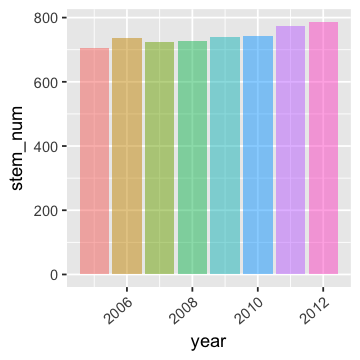

In [19]:
options(repr.plot.width=3, repr.plot.height=3)

df_uryu_tidy %>% dplyr::select(-note) %>% 
  dplyr::filter(!is.na(gbh)) %>% 
  group_by(year) %>% 
  summarise(stem_num = n()) %>% 
  ggplot(aes(year, stem_num, fill = factor(year))) + 
  geom_bar(stat = "identity", alpha = 0.5) +
  theme(axis.text.x = element_text(angle = 40, hjust = 1)) +
  guides(fill = FALSE)

In [20]:
quartzFonts(YuGo = quartzFont(rep("YuGo-Medium", 4)))
theme_set(theme_classic(base_size = 12, base_family = "YuGo"))

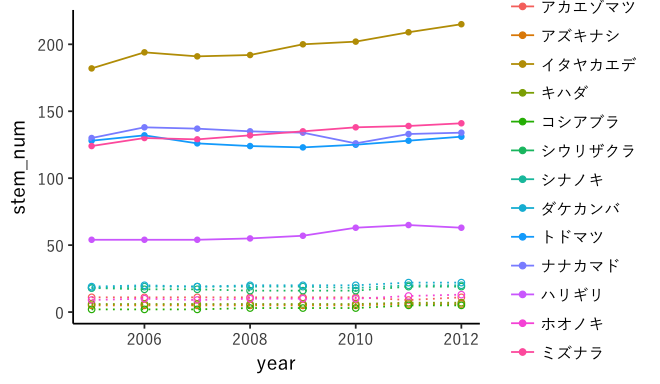

In [21]:
options(repr.plot.width=5.5, repr.plot.height=3.2)
df_uryu_tidy %>% dplyr::filter(!is.na(gbh)) %>% 
  group_by(year, spc_japan) %>% 
  summarise(stem_num = n()) %>% {
    tgt_sp <<- dplyr::filter(., stem_num > 50) %$% spc_japan %>% unique()
    p <<- ggplot(., aes(year, stem_num, color = spc_japan)) +
      geom_point(aes(shape = ifelse(stem_num > 50, 16, 21))) +
      geom_line(aes(linetype = ifelse(stem_num > 50, 1, 3))) +
      scale_shape_identity() +
      scale_linetype_identity()
  }
p

### 一般化線形モデル

In [22]:
tgt_sp

[1] "イタヤカエデ" "トドマツ"     "ナナカマド"   "ハリギリ"     "ミズナラ"

In [23]:
df_uryu_tidy %>% dplyr::filter(spc_japan %in% tgt_sp, 
                               year == 2012, 
                               !is.na(rgr), rgr > 0) %>%  # rgrが欠損しておらず、０よりも大きいデータが対象
  glm(formula = rgr ~ gbh, 
      family = "Gamma"(link = "log"),
      data = .) %>% tidy()

term,estimate,std.error,statistic,p.value
(Intercept),-3.469032973,0.0459167365,-75.55051,7.026832e-296
gbh,-0.008117882,0.0005593466,-14.51315,9.612315e-41


種ごとの傾向を確認したい時には`dplyr::do()`

In [24]:
df_uryu_tidy %>% dplyr::filter(spc_japan %in% tgt_sp,
                                                 year == 2012, 
                                                 !is.na(rgr), rgr > 0) %>% 
  group_by(spc_japan) %>% 
  do(glm(formula = rgr ~ gbh, 
         family = "Gamma"(link = "log"),
         data = .) %>% 
       tidy())

spc_japan,term,estimate,std.error,statistic,p.value
イタヤカエデ,(Intercept),-3.236743352,0.1079892974,-29.972816,1.173952e-68
イタヤカエデ,gbh,-0.015070635,0.0019277081,-7.817903,6.016998e-13
トドマツ,(Intercept),-3.611431447,0.1699936372,-21.244510,4.335896e-41
トドマツ,gbh,-0.006730248,0.0015603420,-4.313316,3.479530e-05
ナナカマド,(Intercept),-3.652553226,0.1324491719,-27.577018,5.269471e-52
ナナカマド,gbh,-0.007268562,0.0034716603,-2.093685,3.852474e-02
ハリギリ,(Intercept),-3.424058307,0.1027250697,-33.332256,2.476545e-35
ハリギリ,gbh,-0.008161431,0.0016080389,-5.075394,5.970280e-06
ミズナラ,(Intercept),-3.165106826,0.0745400773,-42.461813,2.697232e-71
ミズナラ,gbh,-0.009147988,0.0006452928,-14.176492,7.829629e-27


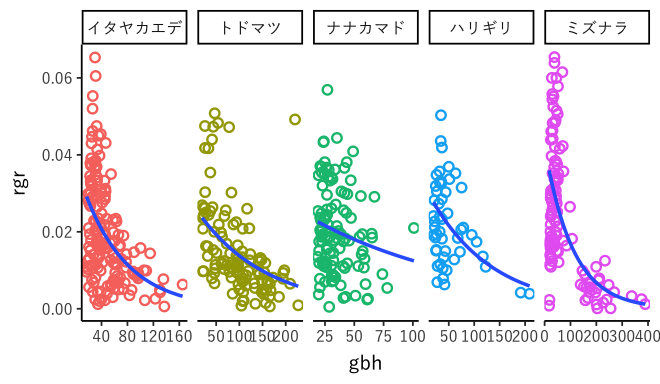

In [25]:
df_uryu_tidy %>% dplyr::filter(spc_japan %in% tgt_sp,
                               year == 2012, 
                               !is.na(rgr), rgr > 0, rgr < 0.10) %>% 
      ggplot(aes(gbh, rgr)) +
      geom_point(aes(colour = spc_japan), size = 2, shape = 21, stroke = 1) +
      geom_smooth(method = "glm",
                  method.args = list(family = "Gamma"(link = "log")),
                  se = FALSE) +
      facet_wrap(~ spc_japan, scales = "free_x", ncol = 5) +
      guides(colour = FALSE)

## データを元の形式に戻す

In [26]:
df_uryu_tidy %>% dplyr::select(-rgr) %>% {
  tmp_df_gbh <<- dplyr::select(., -note) %>% 
    unite(col = indv_id, obs_first, id, sep = "_") %>% 
    spread(key = year, value = gbh) %>% 
    dplyr::rename(gbh05 = `2005`,
                  gbh06 = `2006`,
                  gbh07 = `2007`,
                  gbh08 = `2008`,
                  gbh09 = `2009`,
                  gbh10 = `2010`,
                  gbh11 = `2011`,
                  gbh12 = `2012`)
  tmp_df_note <<- dplyr::select(., -gbh) %>% 
    unite(col = indv_id, obs_first, id, sep = "_") %>% 
    spread(key = year, value = note) %>% 
    dplyr::rename(note05 = `2005`,
                  note06 = `2006`,
                  note07 = `2007`,
                  note08 = `2008`,
                  note09 = `2009`,
                  note10 = `2010`,
                  note11 = `2011`,
                  note12 = `2012`)
}
df_uryu_untidy <- tmp_df_gbh %>% inner_join(tmp_df_note)

Joining, by = c("tag_no", "spc_japan", "indv_id")
